# "Classifiez automatiquement des biens de consommation"
_Merging best results obtained in NLP and PICT notebooks_

## 0 Preliminaries

### 0.0 Importing Packages and Modules

Checking whether the notebook is on Colab or PC

In [1]:
import sys
is_colab = 'google.colab' in sys.modules
is_colab, sys.executable

(True, '/usr/bin/python3')

Mounting my Drive if on Colab

In [2]:
from google.colab import files, output, drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


Installations and importations required in the virtual environment.

In [3]:
!pip install wikipedia2vec==0.2.2
!pip install category-encoders
!pip install plotly>=4.0.0
!wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
!chmod +x /usr/local/bin/orca
!apt-get install xvfb libgtk2.0-0 libgconf-2-4
# !pip install tensorflow-hub
# !pip install tensorflow==2.1.0

     |████████████████████████████████| 1.1MB 5.7MB/s 
     |████████████████████████████████| 276kB 36.0MB/s 
     |████████████████████████████████| 143kB 39.8MB/s 
  Created wheel for wikipedia2vec: filename=wikipedia2vec-0.2.2-cp36-cp36m-linux_x86_64.whl size=4423262 sha256=bd9f02d9ef41996f3f153423da278c8ba749c177de1a7e9158b0bf97c7591035
  Stored in directory: /root/.cache/pip/wheels/bf/bc/96/1ac030513bf05d0d47d5dc6d194a73595dbcd7d1ff79145130
  Created wheel for marisa-trie: filename=marisa_trie-0.7.5-cp36-cp36m-linux_x86_64.whl size=862167 sha256=9e19d4e3eb1441b59eecd8b7f0501bcde9fc0b99cac618a7663b60b9db10e265
  Stored in directory: /root/.cache/pip/wheels/45/24/79/022624fc914f0e559fe8a1141aaff1f9df810905a13fc75d57
  Created wheel for mwparserfromhell: filename=mwparserfromhell-0.5.4-cp36-cp36m-linux_x86_64.whl size=183779 sha256=cace350d16be36fb19c2ab7767d193609982f7675e17891d8b2c29eb61a3ce83
  Stored in directory: /root/.cache/pip/wheels/2a/76/d5/7088b941df3b362c45dd7912dd05314b

In [4]:
import os
if os.getcwd()!='/gdrive/My Drive/--DATA SCIENCE/PROJET6/NOTEBOOKS':
    os.chdir('/gdrive/My Drive/--DATA SCIENCE/PROJET6/NOTEBOOKS')

!pip install -r requirements_nlp.txt

     |████████████████████████████████| 51kB 2.5MB/s 
     |████████████████████████████████| 3.9MB 6.7MB/s 
     |████████████████████████████████| 421.8MB 35kB/s 
     |████████████████████████████████| 450kB 36.7MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7542 sha256=69831adb3c81831464b38c6096ce8bd93e70e0b322ea6d7d05c5db240b5cfc7d
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.11.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorboard 2.3.0
    Uninstalling tensorboard-2.3.0:
      Successfully uninstalled tensorboard-2.3.0
  Found existing installation: tensorflow-estimator 2.3.0
    Uninstalling tensorflow-estimator-2.3.0:
      Successfully uninstalled tenso

In [5]:
from P6_functions import *

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Installations (creating the requirements file)

In [ ]:
# !pip freeze > requirements_merging.txt

Importation of modules and packages. 

In [6]:
import io
import string
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.facecolor']='w'
from sklearn.cluster import KMeans, AgglomerativeClustering
# import nltk
# nltk.download('punkt')
# nltk.download('stopwords')

Setting pandas display options.

In [7]:
dictPdSettings = {'display.max_rows': 500, 'display.width': 100,
                  'display.max_colwidth': 100,
                  'display.float_format': lambda x: '%.2f' % x}
for k,v in dictPdSettings.items():
  pd.set_option(k,v)

## COMPARAISON DES PREDICTIONS

#### Importing the datasets

In [8]:
### Loading best NLP results (best dataset prior to clustering)
import dill as pickle
with open('NLP_dict_best_df.pkl', 'rb') as file:
    NLP_dict_best_df = pickle.load(file)
### Loading best NLP results (best labels)
import dill as pickle
with open('NLP_df_res_clust.pkl', 'rb') as file:
    NLP_df_res_clust = pickle.load(file)

In [9]:
NLP_df_res_clust.keys()

Index(['categories', 'N01_gsc_preproc_km-ARI', 'N01_gsc_preproc_km-VMEAS',
       'N02_preproc_dimred_km-ARI', 'N02_preproc_dimred_km-VMEAS', 'N03_gsc_preproc_tm-ARI',
       'N03_gsc_preproc_tm-VMEAS', 'N04b_USEpname_dimred_km-ARI', 'N04b_USEpname_dimred_km-VMEAS'],
      dtype='object')

In [ ]:
# #### RE EXPORTATION
# # ### Pickling the best preprocessed dataset prior to clustering
# import dill as pickle
# # best dataframe prior to clustering
# with open('NLP_dict_best_df.pkl', 'wb') as file:
#     pickle.dump(NLP_dict_best_df, file)
# # best labels
# with open('NLP_df_res_clust.pkl', 'wb') as file:
#     pickle.dump(df_res_clust, file)

In [10]:
### Loading best PICT results (best dataset prior to clustering)
import dill as pickle
with open('PICT_dict_best_df.pkl', 'rb') as file:
    PICT_dict_best_df = pickle.load(file)
### Loading best PICT results (best labels)
import dill as pickle
with open('PICT_df_res_clust.pkl', 'rb') as file:
    PICT_df_res_clust = pickle.load(file)

In [11]:
# harmonize the names of the clusters with the names of true categories

NLP_df_res_clust = categ_identificator(NLP_df_res_clust, true_cat=None)
PICT_df_res_clust = categ_identificator(PICT_df_res_clust, true_cat=None)

### A) Voting among predictions

#### NLP only

In [ ]:
# best scores for each main NLP strategies 
ser_pairs_ARI = comp_clust_metrics_col_pairs(NLP_df_res_clust,
                                                first_vs_others=True,
                                                n_score='ari',
                                                print_opt=False)
ser_pairs_VMEAS = comp_clust_metrics_col_pairs(NLP_df_res_clust,
                                                first_vs_others=True,
                                                n_score='v_meas',
                                                print_opt=False)
display(ser_pairs_ARI, ser_pairs_VMEAS)

(categories, N01_gsc_preproc_km-ARI)                   0.40
(categories, N01_gsc_preproc_km-VMEAS)                 0.33
(categories, N02_preproc_dimred_km-ARI)                0.47
(categories, N02_preproc_dimred_km-VMEAS)              0.43
(categories, N03_gsc_preproc_tm-ARI)                   0.56
(categories, N03_gsc_preproc_tm-VMEAS)                 0.56
(categories, N04a_gsc_preproc_dimreduc_w2v_km-ARI)     0.56
(categories, N04a_gsc_preproc_dimreduc_w2v_km-VMEAS)   0.56
(categories, N04b_USEpname_dimred_km-ARI)              0.69
(categories, N04b_USEpname_dimred_km-VMEAS)            0.69
Name: ari_7.0_1st_vs_others, dtype: float64

(categories, N01_gsc_preproc_km-ARI)                   0.57
(categories, N01_gsc_preproc_km-VMEAS)                 0.60
(categories, N02_preproc_dimred_km-ARI)                0.53
(categories, N02_preproc_dimred_km-VMEAS)              0.60
(categories, N03_gsc_preproc_tm-ARI)                   0.59
(categories, N03_gsc_preproc_tm-VMEAS)                 0.59
(categories, N04a_gsc_preproc_dimreduc_w2v_km-ARI)     0.63
(categories, N04a_gsc_preproc_dimreduc_w2v_km-VMEAS)   0.63
(categories, N04b_USEpname_dimred_km-ARI)              0.73
(categories, N04b_USEpname_dimred_km-VMEAS)            0.73
Name: v_meas_7.0_1st_vs_others, dtype: float64

Let's try to get a better ari than best ARI = 0.69, and a better v_measure than best v-measure using voting between different cluster predicitions (2 to 6 predictions compared)

In [ ]:
ari_list, v_meas_list = [], []
pairs_list = []

# Loop on the number of columns to include in the voting process
for k in [2,3,4,5,6]:

    print(f'k={k}', end='')
    pairs = combinlist(NLP_df_res_clust.iloc[:,1:].columns, k)

    # Loop on the pairs of columns (different clusters predictions)
    for i, cols in enumerate(pairs, 1):

        print('\r', f'k={k}: {i}/{len(pairs)}', end='')
        # Vote using the most frequent label (mode)
        ser_vote_clust = NLP_df_res_clust[list(cols)].apply(lambda x: x.mode()[0],
                                                            axis=1)
        # Compute ari and v_measure and store in a list
        ari = adjusted_rand_score(NLP_df_res_clust['categories'],
                                ser_vote_clust)
        v_meas = v_measure_score(NLP_df_res_clust['categories'],
                                ser_vote_clust)
        
        ari_list.append(ari)
        v_meas_list.append(v_meas)

    pairs_list.extend(pairs)

# put the results in a dataframe and show the best ari and v_measure obtained
df_voting = pd.DataFrame({'ari': ari_list,
                          'v_meas': v_meas_list},
                         index = pairs_list)
print('\n', df_voting.max())

 k=6: 210/210
 ari      0.69
v_meas   0.73
dtype: float64


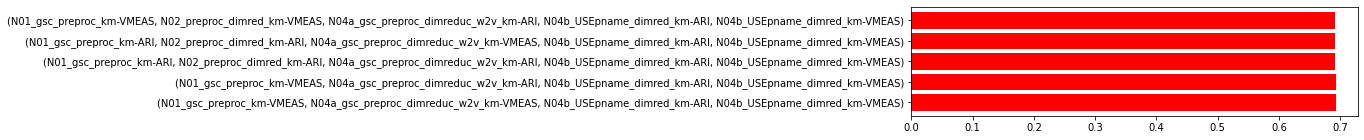

In [ ]:
# plot best score for vote (between 2 to 6 pairs)
fig = plt.figure(figsize=(8,2))
df_voting['ari'].sort_values(ascending=False)[0:5].plot.barh(width=0.8,
                                                             color='red')

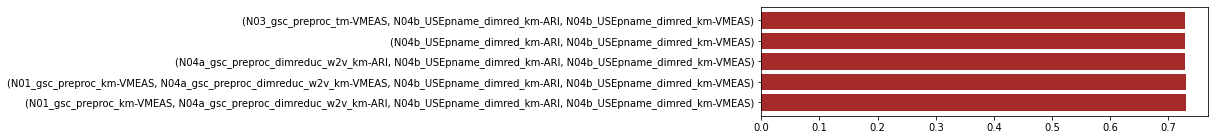

In [ ]:
fig = plt.figure(figsize=(8,2))
df_voting['v_meas'].sort_values(ascending=False)[0:5].plot.barh(width=0.8,
                                                             color='brown')

#### PICT only

In [ ]:
# best scores for each main NLP strategies 
ser_pairs_ARI = comp_clust_metrics_col_pairs(PICT_df_res_clust,
                                                first_vs_others=True,
                                                n_score='ari',
                                                print_opt=False)
ser_pairs_VMEAS = comp_clust_metrics_col_pairs(PICT_df_res_clust,
                                                first_vs_others=True,
                                                n_score='v_meas',
                                                print_opt=False)
display(ser_pairs_ARI, ser_pairs_VMEAS)

(category, P01_gsc_preproc_dimred_km-ARI)     0.09
(category, P01_gsc_preproc_dimred_km-VMEAS)   0.09
(category, P02_gsc_preproc_bovw_km-ARI)       0.07
(category, P02_gsc_preproc_bovw_km-VMEAS)     0.07
Name: ari_7.0_1st_vs_others, dtype: float64

(category, P01_gsc_preproc_dimred_km-ARI)     0.14
(category, P01_gsc_preproc_dimred_km-VMEAS)   0.14
(category, P02_gsc_preproc_bovw_km-ARI)       0.11
(category, P02_gsc_preproc_bovw_km-VMEAS)     0.11
Name: v_meas_7.0_1st_vs_others, dtype: float64

Let's try to get a better ari than best ARI = 0.14, and a better v_measure than best v-measure using voting between different cluster predicitions (2 to 6 predictions compared)

In [ ]:
ari_list, v_meas_list = [], []
pairs_list = []

# Loop on the number of columns to include in the voting process
for k in [2,3,4]:

    print(f'k={k}', end='')
    pairs = combinlist(PICT_df_res_clust.iloc[:,1:].columns, k)

    # Loop on the pairs of columns (different clusters predictions)
    for i, cols in enumerate(pairs, 1):

        print('\r', f'k={k}: {i}/{len(pairs)}', end='')
        # Vote using the most frequent label (mode)
        ser_vote_clust = PICT_df_res_clust[list(cols)].apply(lambda x: x.mode()[0],
                                                            axis=1)
        # Compute ari and v_measure and store in a list
        ari = adjusted_rand_score(PICT_df_res_clust['category'],
                                ser_vote_clust)
        v_meas = v_measure_score(PICT_df_res_clust['category'],
                                ser_vote_clust)
        
        ari_list.append(ari)
        v_meas_list.append(v_meas)

    pairs_list.extend(pairs)

# put the results in a dataframe and show the best ari and v_measure obtained
df_voting = pd.DataFrame({'ari': ari_list,
                          'v_meas': v_meas_list},
                         index = pairs_list)
print('\n', df_voting.max())

 k=4: 1/1
 ari      0.09
v_meas   0.14
dtype: float64


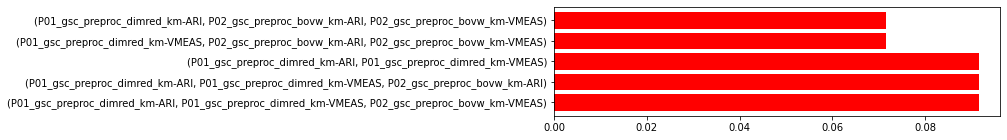

In [ ]:
# plot best score for vote (between 2 to 6 pairs)
fig = plt.figure(figsize=(8,2))
df_voting['ari'].sort_values(ascending=False)[0:5].plot.barh(width=0.8,
                                                             color='red')

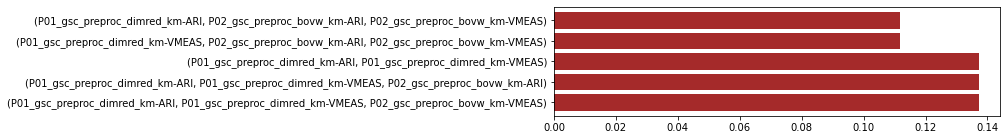

In [ ]:
fig = plt.figure(figsize=(8,2))
df_voting['v_meas'].sort_values(ascending=False)[0:5].plot.barh(width=0.8,
                                                             color='brown')

#### Best NLP and best PICT predictions

In [12]:
NLP_df_res_clust.keys(), PICT_df_res_clust.keys()

Index(['category', 'P01_gsc_preproc_dimred_km-ARI', 'P01_gsc_preproc_dimred_km-VMEAS',
       'P02_gsc_preproc_bovw_km-ARI', 'P02_gsc_preproc_bovw_km-VMEAS',
       'P03_gsc_preproc_cnn_dimreduc_km-ARI', 'P03_gsc_preproc_cnn_dimreduc_km-VMEAS'],
      dtype='object')

In [13]:
df_res_clust = pd.concat([NLP_df_res_clust.reset_index(),
                          PICT_df_res_clust.reset_index()],
                         axis=1)[['uniq_id', 'categories',
                                  'N04b_USEpname_dimred_km-ARI',
                                 'N04b_USEpname_dimred_km-VMEAS',
                                 'P03_gsc_preproc_cnn_dimreduc_km-ARI',
                                 'P03_gsc_preproc_cnn_dimreduc_km-VMEAS']].set_index('uniq_id')

In [19]:
df_res_clust.head(3)

,categories,N04b_USEpname_dimred_km-ARI,N04b_USEpname_dimred_km-VMEAS,P03_gsc_preproc_cnn_dimreduc_km-ARI,P03_gsc_preproc_cnn_dimreduc_km-VMEAS
uniq_id,,,,,
55b85ea15a1536d46b7190ad6fff8ce7,Furnishing,Furnishing,Furnishing,Furnishing,Furnishing
7b72c92c2f6c40268628ec5f14c6d590,Baby,Furnishing,Furnishing,Furnishing,Furnishing
64d5d4a258243731dc7bbb1eef49ad74,Baby,Furnishing,Furnishing,Furnishing,Furnishing


In [14]:
# best scores for each main NLP strategies 
ser_pairs_ARI = comp_clust_metrics_col_pairs(df_res_clust,
                                                first_vs_others=True,
                                                n_score='ari',
                                                print_opt=False)
ser_pairs_VMEAS = comp_clust_metrics_col_pairs(df_res_clust,
                                                first_vs_others=True,
                                                n_score='v_meas',
                                                print_opt=False)
display(ser_pairs_ARI, ser_pairs_VMEAS)

(categories, N04b_USEpname_dimred_km-ARI)             0.69
(categories, N04b_USEpname_dimred_km-VMEAS)           0.69
(categories, P03_gsc_preproc_cnn_dimreduc_km-ARI)     0.52
(categories, P03_gsc_preproc_cnn_dimreduc_km-VMEAS)   0.52
Name: ari_7.0_1st_vs_others, dtype: float64

(categories, N04b_USEpname_dimred_km-ARI)             0.73
(categories, N04b_USEpname_dimred_km-VMEAS)           0.73
(categories, P03_gsc_preproc_cnn_dimreduc_km-ARI)     0.57
(categories, P03_gsc_preproc_cnn_dimreduc_km-VMEAS)   0.57
Name: v_meas_7.0_1st_vs_others, dtype: float64

Let's try to get a better ari than best ARI = 0.69, and a better v_measure than best v-measure using voting between different cluster predicitions (2 to 6 predictions compared)

In [24]:
ari_list, v_meas_list = [], []
pairs_list = []

# Loop on the number of columns to include in the voting process
for k in [2,3,4]:

    print(f'k={k}', end='')
    pairs = combinlist(df_res_clust.iloc[:,1:].columns, k)

    # Loop on the pairs of columns (different clusters predictions)
    for i, cols in enumerate(pairs, 1):

        print('\r', f'k={k}: {i}/{len(pairs)}', end='')
        # Vote using the most frequent label (mode)
        ser_vote_clust = df_res_clust[list(cols)].apply(lambda x: x.mode()[0],
                                                            axis=1)
        # Compute ari and v_measure and store in a list
        ari = adjusted_rand_score(df_res_clust['categories'],
                                ser_vote_clust)
        v_meas = v_measure_score(df_res_clust['categories'],
                                ser_vote_clust)
        
        ari_list.append(ari)
        v_meas_list.append(v_meas)

    pairs_list.extend(pairs)

# put the results in a dataframe and show the best ari and v_measure obtained
df_voting = pd.DataFrame({'ari': ari_list,
                          'v_meas': v_meas_list},
                         index = pairs_list)
print('\n', df_voting.max())

 k=4: 1/1
 ari      0.69
v_meas   0.73
dtype: float64


In [29]:
df_voting.sort_values('ari', ascending=False)

,ari,v_meas
"(N04b_USEpname_dimred_km-ARI, N04b_USEpname_dimred_km-VMEAS)",0.69,0.73
"(N04b_USEpname_dimred_km-ARI, N04b_USEpname_dimred_km-VMEAS, P03_gsc_preproc_cnn_dimreduc_km-ARI)",0.69,0.73
"(N04b_USEpname_dimred_km-ARI, N04b_USEpname_dimred_km-VMEAS, P03_gsc_preproc_cnn_dimreduc_km-VMEAS)",0.69,0.73
"(N04b_USEpname_dimred_km-ARI, P03_gsc_preproc_cnn_dimreduc_km-ARI)",0.55,0.61
"(N04b_USEpname_dimred_km-VMEAS, P03_gsc_preproc_cnn_dimreduc_km-ARI)",0.55,0.61
"(N04b_USEpname_dimred_km-ARI, P03_gsc_preproc_cnn_dimreduc_km-VMEAS)",0.55,0.61
"(N04b_USEpname_dimred_km-VMEAS, P03_gsc_preproc_cnn_dimreduc_km-VMEAS)",0.55,0.61
"(N04b_USEpname_dimred_km-ARI, N04b_USEpname_dimred_km-VMEAS, P03_gsc_preproc_cnn_dimreduc_km-ARI, P03_gsc_preproc_cnn_dimreduc_km-VMEAS)",0.55,0.61
"(P03_gsc_preproc_cnn_dimreduc_km-ARI, P03_gsc_preproc_cnn_dimreduc_km-VMEAS)",0.52,0.57
"(N04b_USEpname_dimred_km-ARI, P03_gsc_preproc_cnn_dimreduc_km-ARI, P03_gsc_preproc_cnn_dimreduc_km-VMEAS)",0.52,0.57


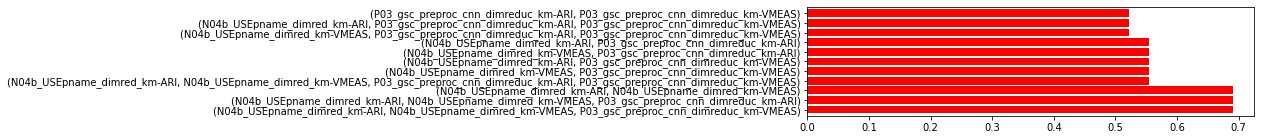

In [25]:
# plot best score for vote (between 2 to 6 pairs)
fig = plt.figure(figsize=(8,2))
df_voting['ari'].sort_values(ascending=False)[0:].plot.barh(width=0.8,
                                                             color='red')

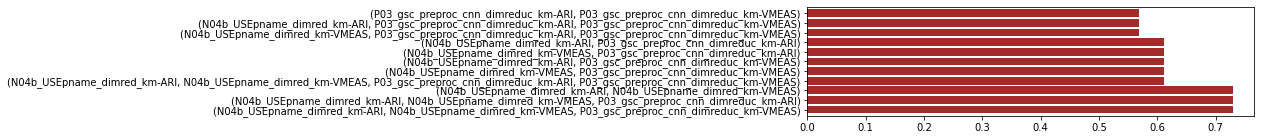

In [26]:
fig = plt.figure(figsize=(8,2))
df_voting['v_meas'].sort_values(ascending=False)[0:].plot.barh(width=0.8,
                                                             color='brown')

### B) Mixing features

In [44]:
# merge the content of the two dictionaries (containing best features)
dict_best_df = {**NLP_dict_best_df, **PICT_dict_best_df}
list(dict_best_df.keys())

['N01_gsc_preproc_km-ARI',
 'N01_gsc_preproc_km-VMEAS',
 'N02_preproc_dimred_km-ARI',
 'N02_preproc_dimred_km-VMEAS',
 'N03_gsc_preproc_tm-ARI',
 'N03_gsc_preproc_tm-VMEAS',
 'N04a_gsc_preproc_dimreduc_w2v_km-ARI',
 'N04a_gsc_preproc_dimreduc_w2v_km-VMEAS',
 'N04b_USEpname_dimred_km-ARI',
 'N04b_USEpname_dimred_km-VMEAS',
 'P01_gsc_preproc_dimred_km-ARI',
 'P01_gsc_preproc_dimred_km-VMEAS',
 'P02_gsc_preproc_bovw_km-ARI',
 'P02_gsc_preproc_bovw_km-VMEAS',
 'P03_gsc_preproc_cnn_dimreduc_km-ARI',
 'P03_gsc_preproc_cnn_dimreduc_km-VMEAS']

In [56]:
list(dict_best_df.keys())
# pair_cols = combinlist(list(dict_best_df.keys()), 2)
pair_cols = combinlist(['P03_gsc_preproc_cnn_dimreduc_km-ARI',
                        'P03_gsc_preproc_cnn_dimreduc_km-VMEAS',
                        'N04b_USEpname_dimred_km-ARI',
                        'N04b_USEpname_dimred_km-VMEAS'],2)

In [57]:
pair_cols

[('P03_gsc_preproc_cnn_dimreduc_km-ARI',
  'P03_gsc_preproc_cnn_dimreduc_km-VMEAS'),
 ('P03_gsc_preproc_cnn_dimreduc_km-ARI', 'N04b_USEpname_dimred_km-ARI'),
 ('P03_gsc_preproc_cnn_dimreduc_km-VMEAS', 'N04b_USEpname_dimred_km-ARI'),
 ('P03_gsc_preproc_cnn_dimreduc_km-ARI', 'N04b_USEpname_dimred_km-VMEAS'),
 ('P03_gsc_preproc_cnn_dimreduc_km-VMEAS', 'N04b_USEpname_dimred_km-VMEAS'),
 ('N04b_USEpname_dimred_km-ARI', 'N04b_USEpname_dimred_km-VMEAS')]

In [59]:
'''
Class to get from the big dataframe df_pict (containing all
the preprocessed images) one series of preprocessed images (column : n_col_img)
and unfold the data to get a dataframe with each pixel as a column
'''

class GetFeaturesFromDict(BaseEstimator, TransformerMixin):

    def __init__(self, n_col_img=None):
        self.n_col_img = n_col_img # one column of a list of columns

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None): # X is the big df_pict datafram
        X_trans = pd.DataFrame()
        # get the selected columns (n_col_img) from dictionary (X)
        for key in self.n_col_img:
            X_trans = pd.concat([X_trans, X[key]],
                                axis=1)
        return X_trans

    def fit_transform(self, X, y=None):
        self.fit(X, y)
        return self.transform(X, y)

In [86]:
# Define the pipeline to be executed and optimized by the GridSearch
pipe = Pipeline([('featgetter', GetFeaturesFromDict()), # Preprocessed Images getter
                 ('dimreduc', PCA(random_state=14)), # Dimension reductor
                 ('clusterer', KMeans(random_state=14))]) # KMeans clusterer

# Define the list of params to be tested in the GridSearchClust
param_grid = [{'featgetter__n_col_img': pair_cols,
              'dimreduc': [UMAP(random_state=14),
                           PCA(random_state=14)],
              'dimreduc__n_components': [2,3,4],
              'clusterer': [KMeans(random_state=14),
                            # AgglomerativeClustering()
                            ],
              'clusterer__n_clusters': [7]
              },
              {'featgetter__n_col_img': pair_cols,
              'dimreduc': [TSNE_wrapper(random_state=14)],
              'dimreduc__n_components': [2,3],
              'clusterer': [KMeans(random_state=14),
                            # AgglomerativeClustering()
                            ],
              'clusterer__n_clusters': [7]
              }]

# Instanciate of the GridSearch object
gsc = GridSearchClust(estimator=pipe,
                      param_grid_estim=param_grid,
                      scoring=['silh', 'cal-har', 'dav_bould',
                               'ami', 'ari', 'homog', 'complet', 'v_meas'],
                      scoring_true_lab=df_res_clust['categories'],
                      refit='ari',
                      greater_is_better=True) # for the refit_score

In [87]:
# convert the np.arrays in the dictionary into dataframe
new_dict = {}
for k, v in dict_best_df.items():
    # print(k, v.shape)
    new_dict[k] = pd.DataFrame(v,
                               index=df_res_clust.index)

In [88]:
# ##### Perform the grid search
# gsc.fit(new_dict, verbose=True); # 

 6/48:

/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning:

Graph is not fully connected, spectral embedding may not work as expected.



 48/48:

In [114]:
# ### Pickling the results
# import dill as pickle
# with open('NP01_mixing_features.pkl', 'wb') as file:
#     pickle.dump(gsc, file)

In [ ]:
### Loading the results
import dill as pickle
with open('NP01_mixing_features.pkl', 'rb') as file:
    gsc = pickle.load(file)

In [92]:
# Display results (products name) A REMPLACER

print("Best hyperparameters:", gsc.best_params_)
print("Best refit score:", gsc.best_score_)
# Best hyperparameters: {'clusterer': KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
#        n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
#        random_state=14, tol=0.0001, verbose=0), 'clusterer__n_clusters': 7,
# 'dimreduc': PCA(copy=True, iterated_power='auto', n_components=4, random_state=14,
#     svd_solver='auto', tol=0.0, whiten=False), 'dimreduc__n_components': 4,
# 'featgetter__n_col_img': ('P03_gsc_preproc_cnn_dimreduc_km-ARI', 'N04b_USEpname_dimred_km-ARI')}
# Best refit score: 0.7120406841272756

Best hyperparameters: {'clusterer': KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=14, tol=0.0001, verbose=0), 'clusterer__n_clusters': 7, 'dimreduc': PCA(copy=True, iterated_power='auto', n_components=4, random_state=14,
    svd_solver='auto', tol=0.0, whiten=False), 'dimreduc__n_components': 4, 'featgetter__n_col_img': ('P03_gsc_preproc_cnn_dimreduc_km-ARI', 'N04b_USEpname_dimred_km-ARI')}
Best refit score: 0.7120406841272756


Plotting the results of the clustering optimization

In [93]:
# Compute the dataframe showing the results depending on one parameter
# (other parameters set tot best_params_)

filters_gsc_results(gsc, 'featgetter__n_col_img', n_score='ari')

,silh,cal-har,dav_bould,ami,ari,homog,complet,v_meas
featgetter__n_col_img,,,,,,,,
"(P03_gsc_preproc_cnn_dimreduc_km-ARI, P03_gsc_preproc_cnn_dimreduc_km-VMEAS)",0.41,1129.96,0.82,0.56,0.52,0.57,0.57,0.57
"(P03_gsc_preproc_cnn_dimreduc_km-ARI, N04b_USEpname_dimred_km-ARI)",0.46,1012.58,0.85,0.74,0.71,0.74,0.74,0.74
"(P03_gsc_preproc_cnn_dimreduc_km-VMEAS, N04b_USEpname_dimred_km-ARI)",0.46,1012.58,0.85,0.74,0.71,0.74,0.74,0.74
"(P03_gsc_preproc_cnn_dimreduc_km-ARI, N04b_USEpname_dimred_km-VMEAS)",0.46,1012.58,0.85,0.74,0.71,0.74,0.74,0.74
"(P03_gsc_preproc_cnn_dimreduc_km-VMEAS, N04b_USEpname_dimred_km-VMEAS)",0.46,1012.58,0.85,0.74,0.71,0.74,0.74,0.74
"(N04b_USEpname_dimred_km-ARI, N04b_USEpname_dimred_km-VMEAS)",0.55,1908.31,0.61,0.73,0.69,0.73,0.73,0.73


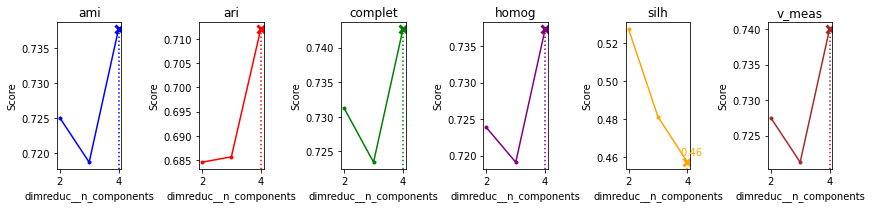

In [94]:
# Plotting the graphs of the clustering scores with best refit score (line)

optim_score = 'ari'

plot_gsc_multi_scores(gsc=gsc, param='dimreduc__n_components', title=None,
                      scores=['ari', 'ami', 'complet', 'homog', 'v_meas', 'silh'],
                      x_log=False, figsize=(12, 3), optim_score=optim_score)

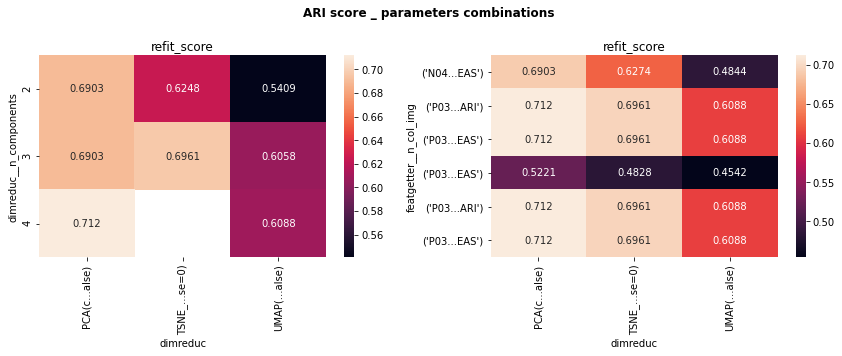

In [95]:
# Effect of 2 parameters on clustering scores

params1 = ['dimreduc__n_components', 'dimreduc']
params2 = ['featgetter__n_col_img', 'dimreduc']

fig = plt.figure(figsize=(12,5))

ax1 = fig.add_subplot(1,2,1)
plot_2D_gsclust_param_opt(gsc, params=params1, shorten_label=5, ax=ax1)

ax2 = fig.add_subplot(1,2,2)
plot_2D_gsclust_param_opt(gsc, params=params2, shorten_label=5, ax=ax2)


plt.gcf().suptitle('ARI score _ parameters combinations', fontweight='bold')
plt.tight_layout(rect=[0,0,1,0.92])


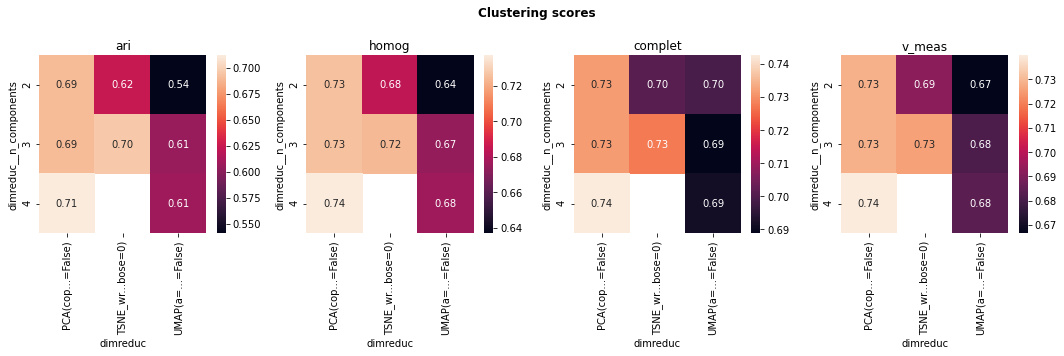

In [96]:
# All the scores through 2 chosen parameters

fig = plt.figure(figsize=(15,5))
params = ['dimreduc__n_components', 'dimreduc']
scores = ['ari', 'homog', 'complet', 'v_meas']

### Looping on all the scores
for i, score in enumerate(scores, 1):
    ax = fig.add_subplot(1,len(scores),i)
    plot_2D_gsclust_param_opt(gsc, params=params, fmt='.2f',
                              score=score, title=None, ax=ax)
    
plt.gcf().suptitle('Clustering scores', fontweight='bold')
plt.tight_layout(rect=[0,0,1,0.92])

In [101]:
# Computing the best preprocessed dataset prior to clustering

dict_best_df['NP_mixing_features-ARI'] = \
                gsc.transform(new_dict,
                            optim_score='v_meas')
dict_best_df['NP_mixing_features'] = \
                gsc.transform(new_dict,
                            optim_score='ari')

In [102]:
# Storing labels of the best model in a dataframe

df_res_clust['NP_mixing_features-ARI'] = \
                gsc.predict(new_dict,
                            optim_score='ari')
df_res_clust['NP_mixing_features-VMEAS'] = \
                gsc.predict(new_dict,
                            optim_score='v_meas')

### Final evaluation

#### Matching scores (true categories vs. clusters)

In [103]:
# Comparison of clusters labels with true categories

from sklearn.metrics import adjusted_rand_score, v_measure_score

ser_pairs_ARI = comp_clust_metrics_col_pairs(df_res_clust,
                                             first_vs_others=True,
                                             n_score='ari',
                                             print_opt=True)
ser_pairs_VMEAS = comp_clust_metrics_col_pairs(df_res_clust,
                                               first_vs_others=True,
                                               n_score='v_meas',
                                               print_opt=True)

--- ari between first and the 6 others ---
ari: mean=0.641, std=0.085, min=0.522, max=0.712 
--- v_meas between first and the 6 others ---
v_meas: mean=0.679, std=0.079, min=0.568, max=0.740 


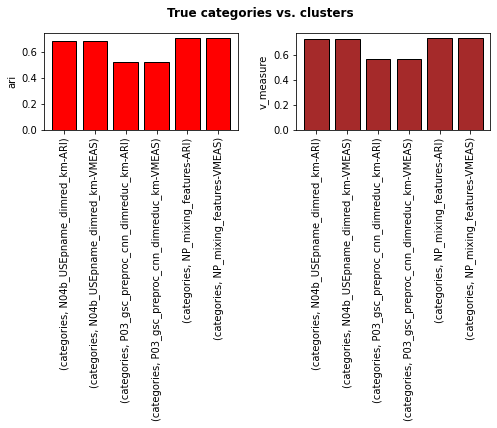

In [104]:
# Plotting the results

fig = plt.figure(figsize=(8,2))

ax1 = fig.add_subplot(121)
ser_pairs_ARI.plot.bar(width=0.8, color='red', ec='k', ax=ax1)
ax1.set_ylabel('ari')
# ax1.set(ylim=(0,1))

ax2 = fig.add_subplot(122)
ser_pairs_VMEAS.plot.bar(width=0.8, color='brown', ec='k', ax=ax2)
ax2.set_ylabel('v_measure')
# ax2.set(ylim=(0,1))

fig.suptitle('True categories vs. clusters',
             fontweight='bold')
fig.subplots_adjust(top=0.8, wspace=0.3)
plt.show()

#### Confusion matrix

In [105]:
df_res_clust.columns

Index(['categories', 'N04b_USEpname_dimred_km-ARI', 'N04b_USEpname_dimred_km-VMEAS',
       'P03_gsc_preproc_cnn_dimreduc_km-ARI', 'P03_gsc_preproc_cnn_dimreduc_km-VMEAS',
       'NP_mixing_features-ARI', 'NP_mixing_features-VMEAS'],
      dtype='object')

In [106]:
cat_clust_confmat = plot_conf_matrix_cat_vs_clust(df_res_clust['categories'],
                                                  df_res_clust['NP_mixing_features-ARI'],
                                                  normalize=False,
                                                  margins_sums=True,
                                                  margins_score=True)
with pd.option_context('display.float_format', '{:.0f}'.format):
    display(cat_clust_confmat)

NP_mixing_features-ARI,5,3,4,6,0,1,2,cat_sum,cat_matching_score_pct
categories,,,,,,,,,
Baby,93,6,1,14,32,4,0,150,62
Beauty,11,121,3,3,2,8,2,150,81
Computers,0,0,141,0,0,8,1,150,94
Decor,1,0,1,133,5,7,3,150,89
Furnishing,0,0,0,6,144,0,0,150,96
Kitchen,0,1,24,5,1,119,0,150,79
Watches,0,0,0,0,0,0,150,150,100
clust_sum,105,128,170,161,184,146,156,-,-
clust_matching_score_pct,89,95,83,83,78,82,96,-,-


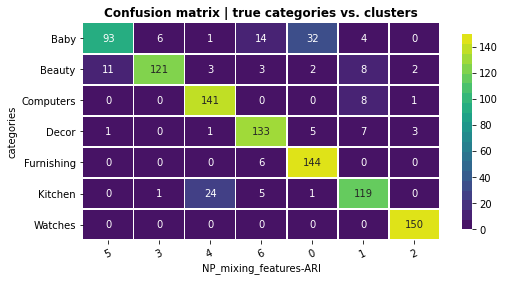

In [108]:
cm = plot_conf_matrix_cat_vs_clust(df_res_clust['categories'],
                            df_res_clust['NP_mixing_features-ARI'],
                            normalize=False,
                            margins_sums=False,
                            margins_score=False)
plot_heatmap(cm, "Confusion matrix | true categories vs. clusters",
             figsize=(8, 4), vmin=0, vmax=150, center=75,
                 palette=sns.color_palette("viridis", 20), shape='rect',
                 fmt='.0f', robust=False, fig=None, ax=None)

####  Sankey confusion diagram

In [109]:
# to get interactive graph
plot_sankey_confusion_mat(cm, static=False, font_size=14, palette='tab10')

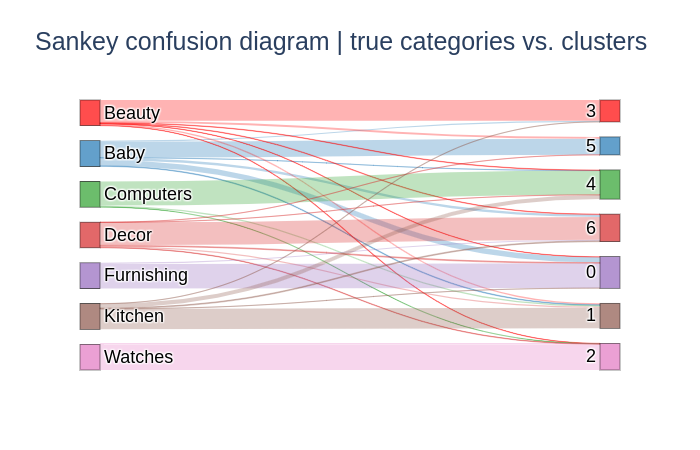

In [110]:
# # to get interactive graph
# plot_sankey_confusion_mat(cm, static=False, font_size=14)

# to get static graph static
import plotly.graph_objects as go
from IPython.display import Image

img_bytes = plot_sankey_confusion_mat(cm, static=True, font_size=18,
                                      figsize=(2, 1.7), scale = 1)
Image(img_bytes)

#### 2D visualisation

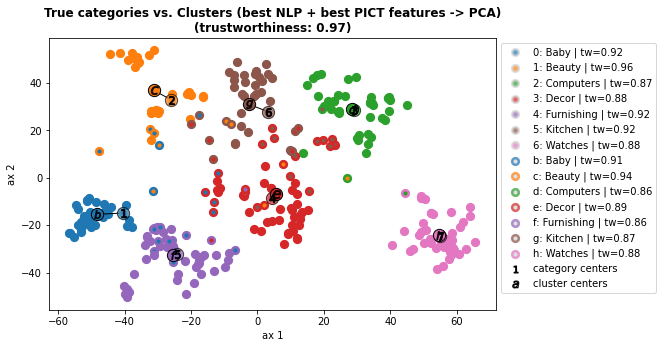

In [113]:
# Plotting a projection of the points (true categories vs. clusters) (PCA 0.71, UMAP 0.81, t-SNE 0.83)

# to plot only a sample of the points
ind_samp = df_res_clust.sample(300, random_state=14).index
data = pd.DataFrame(dict_best_df['NP_mixing_features-ARI'],
                    index=df_res_clust.index)

plot_projection_cat_clust(data.loc[ind_samp],
                          model=None,
                          ser_clust=df_res_clust['N04b_USEpname_dimred_km-ARI'].loc[ind_samp], # clustering already done
                 true_cat=df_res_clust['categories'].loc[ind_samp], # true categories
                 proj='PCA', tw_n_neigh=5, 
                 size=45, edgelinesize=2.5, legend_on=True,
                 title="True categories vs. Clusters (best NLP + best PICT features -> PCA)",
                 figsize=(8, 5), palette='tab10',
                 fig=None, ax=None, random_state=14, bboxtoanchor=(1,1))